Abstract:

The following project is an analysis of chocolate ratings based on cocoa percentage and bean type. The primary focus of the project is to determine which bean type and amount of cocoa used in chocolate production generates the highest ratings by experts within the United States. At first, the project will include comparison between the United States and other countries to measure production rates. The information provided in the data set is beneficial for manufacturers in determining key factors in increasing productivity. The analysis below should display the relevant findings to add chocolate production for United States companies.

Key Take Aways:

-United States average rating = 3.15 out of 4; cocoa percentage = 70%; most common bean type = Amazon Mix

-In comparison to other nations, United States demonstrated the highest level of chocolate production

-Within the United States 70% cocoa content rated highest

-Within the United States highest rated bean origin is Papua New Guinea

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

In [2]:
Choc = pd.read_csv('C:\\Users\\cocob\\Downloads\\flavors_of_cacao.csv')

In [3]:
Choc.rename(columns={'Specific Bean Origin\nor Bar Name':'Specific_Bean', 'Review\nDate':'Review Date', 'Cocoa\nPercent':'Cocoa Percent', 'Company\nLocation':'Company Location', 'Bean\nType':'Bean Type', 'Broad Bean\nOrigin':'Bean Origin'}, inplace=True)

In [4]:
Choc['Cocoa Percent']= Choc['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

Demographics:

In [5]:
Choc.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933
std,552.886365,2.927210,0.063231,0.478062
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000
50%,1069.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


The information listed above gives a basic discription of the numeric values within the dataset. For the purposes of this project main attention should be directed towards Cocoa Percent and Rating.

Cocoa Percent:

The average cocoa percent used in chocolate production is 70%. Given a standard deviation of 0.06, the other cocoa percentages generally do not deviate from 70%.

Rating:

The average rating for type of chocolate among all variables is 3.19. The max and min ratings were 5.00 and 1.00 respectively. 

U.S.A General Info:

The following information displays the cocoa percent and rating averages for the United States as well as the the top five rated and bottom five rated U.S.A. produced chocolates. These findings provide valuable insight for manufactures. When considering future production, U.S. manufacturers would greatly benefit by eliminating bean origins and cocoa percentages that ranked lowest by experts and refocus efforts on top ranking chocolates.

In [8]:
Choc[Choc['Company Location'] == 'U.S.A.'].sort_values(['Cocoa Percent', 'Rating'], ascending=False).mean()

REF              1133.311518
Review Date      2012.892670
Cocoa Percent       0.715177
Rating              3.154123
dtype: float64

In [10]:
Choc[Choc['Company Location'] == 'U.S.A.'].sort_values(['Rating', 'Bean Type'], ascending=False).head()

,Company (Maker-if known),Specific_Bean,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
54,Amano,Morobe,725,2011,0.7,U.S.A.,4.0,,Papua New Guinea
56,Amano,Guayas,470,2010,0.7,U.S.A.,4.0,,Ecuador
107,Arete,"Coto Brus, Terciopelo",1908,2016,0.7,U.S.A.,4.0,,Costa Rica
600,Durci,Corona Arriba,1630,2015,0.7,U.S.A.,4.0,,Ecuador
882,Just Good Chocolate,Peru,1375,2014,0.7,U.S.A.,4.0,,Peru


In [14]:
Choc[Choc['Company Location'] == 'U.S.A.'].sort_values(['Rating', 'Bean Type'], ascending=True).head()

,Company (Maker-if known),Specific_Bean,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
1492,Snake & Butterfly,Ghana,693,2011,0.67,U.S.A.,1.5,Forastero,Ghana
1129,Middlebury,Houseblend,887,2012,0.65,U.S.A.,1.5,,
1441,Scharffen Berger,Kumasi Sambirano,40,2006,0.68,U.S.A.,2.0,Blend,Ghana & Madagascar
1658,Theo,"Venezuela; Barinos, Merida, Tachron",188,2007,0.91,U.S.A.,2.0,Blend,Venezuela
1130,Middlebury,Alto Beni,887,2012,0.75,U.S.A.,2.0,Criollo,Bolivia


Graphics:


The bar graphs below illustrates the top rated cocoa percentage throughout all company locations worldwide and the highest producing company location for the top rated cocoa percentage and overall production, respectively. These graphs provide the manufacturers not only with the knowledge of the cocoa content that would be most lucrative for production, but the company location with the highest level of manufactured goods. As observed below, manufactures should direct attention towards the United States and increase 70% cocoa content chocolate production.

Highest Rated Cocoa Percentage Overall:

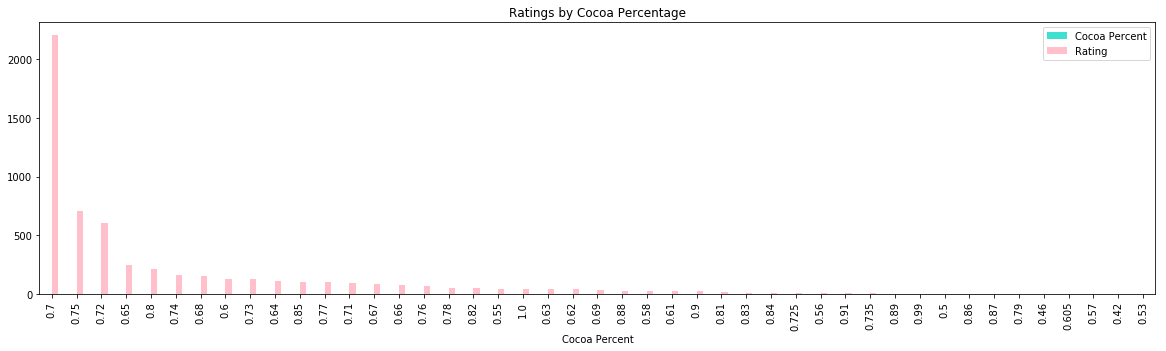

In [21]:
colors= ['turquoise', 'pink']
Choc1= Choc[['Cocoa Percent', 'Rating']]
Choc2= Choc1.groupby(['Cocoa Percent'])['Rating'].sum().reset_index()
Choc3= Choc2.sort_values(by='Rating', ascending=False) 
Choc3.index=Choc3['Cocoa Percent']
Choc3.plot(kind='bar', color= colors, figsize=(20,5))
plt.title('Ratings by Cocoa Percentage')
plt.show()

Cocoa Percentage, US vs Other Countries:

In [22]:
Choc4= Choc[['Company Location', 'Cocoa Percent']]

In [23]:
Choc5= Choc4.groupby(['Company Location'])['Cocoa Percent'].sum()

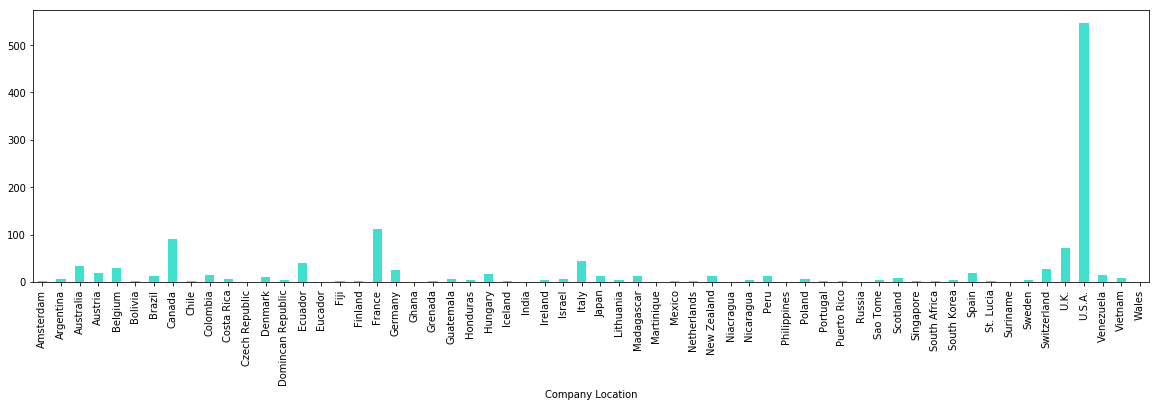

In [25]:
Choc5.plot(kind= 'bar', figsize=(20,5), color= 'turquoise')
plt.show()

In [32]:
Choc6= Choc4.groupby(['Company Location'])['Cocoa Percent'].sum().reset_index()
Choc7= Choc6.sort_values(by= 'Cocoa Percent', ascending=False)

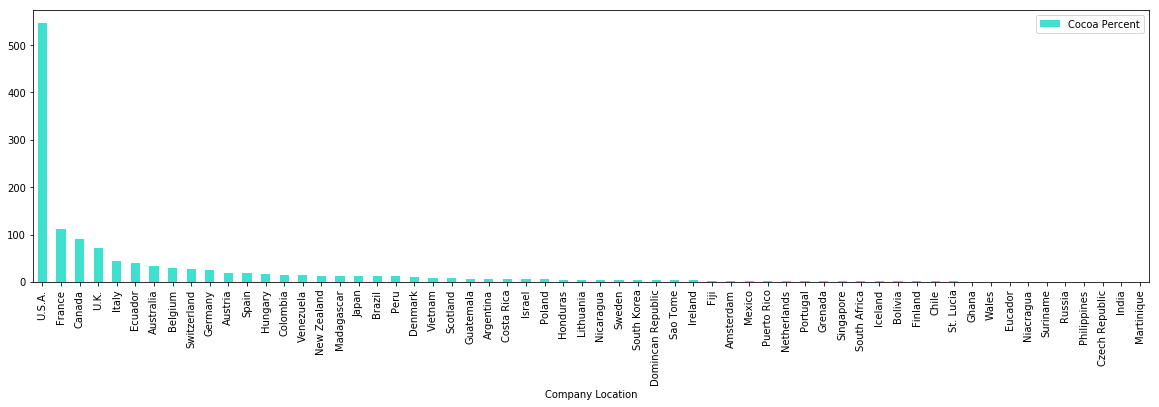

In [33]:
Choc7.index=Choc7['Company Location']
Choc7.plot(kind= 'bar', figsize=(20,5), color= 'turquoise')
plt.show()

As indicated by the bar graphs above, the United States far exceeds other company locations for chocolate production. Appropriately so, the remaining analysis focuses solely on the United States.

Boxplot:

The purpose of the boxplots below is to show the ratings and cocoa percentages by bean type within the U.S.A. Seeing as this information is displayed by means of boxplot, the information below also provides the range for each bean type in terms of rating and cocoa percentage. 

While majority of the ratings and cocoa percentages fall close to the median value, there are few notable outliers. As far as ratings are concerned, Amazon Mix bean type is ranked highest with ratings hardly deviating from the median value which is above 3.5. For this particular bean type, the cocoa percentage is around 75%. In opposition to Amazon Mix, Forastero (Arriba) rating appears lower than most and holds a greater range. Similarly enough, the cocoa percentage range varies comparatively more than other bean types.

In [26]:
Choc6=Choc[Choc['Company Location'] == 'U.S.A.']

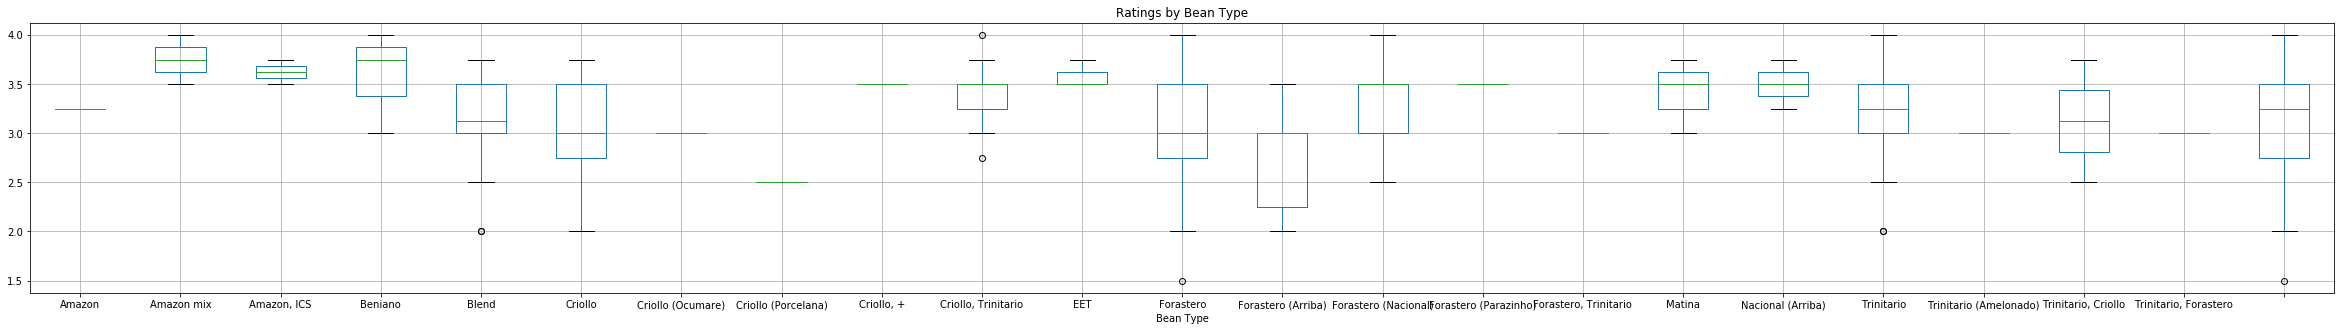

In [48]:
Choc6.boxplot('Rating', by= 'Bean Type', figsize=(40, 5))
plt.title('Ratings by Bean Type')
plt.suptitle("")
plt.show()

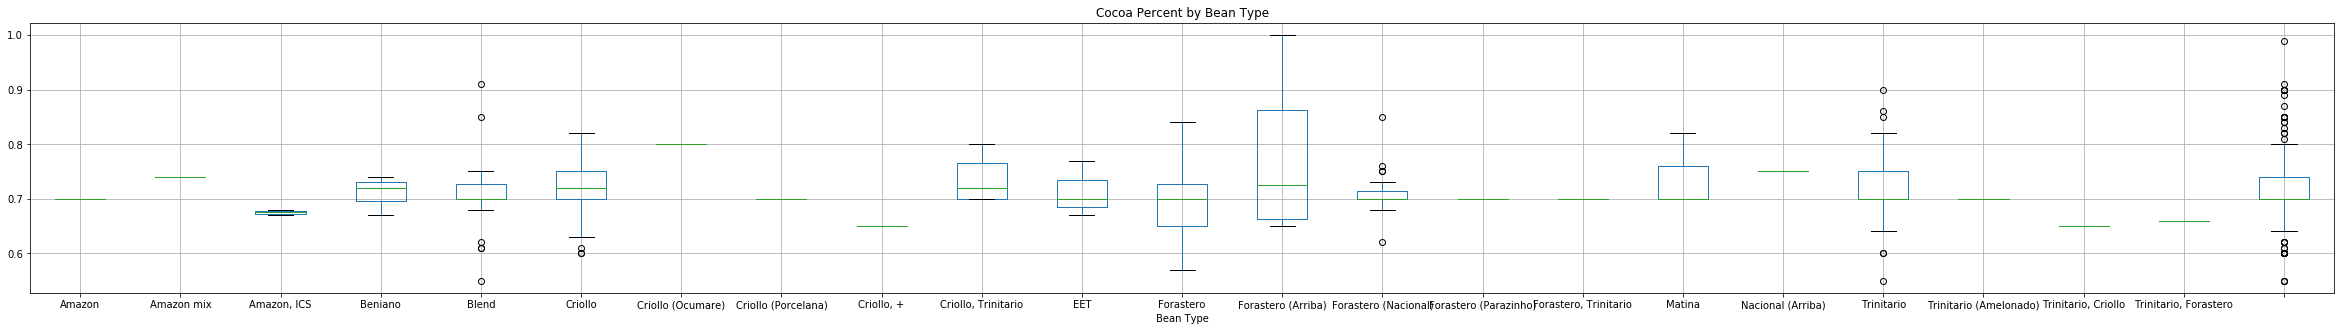

In [49]:
Choc6.boxplot('Cocoa Percent', by= 'Bean Type', figsize=(40, 5))
plt.title('Cocoa Percent by Bean Type')
plt.suptitle("")
plt.show()

Hexbin Scatter Plot:

The purpose of the hexbin scatter plot is to provide the ratings of cocoa percent used in chocolate production within the United States. Inspection of the plot below reveals the chocolate with cocoa percent above 60% holds the most ratings and is typically rated higher.

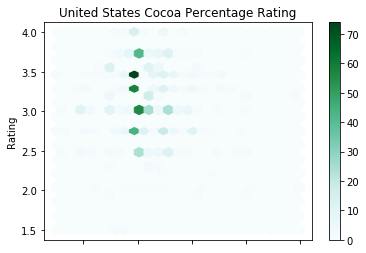

In [38]:
Choc6=Choc[Choc['Company Location'] == 'U.S.A.']
Choc6.plot.hexbin(x='Cocoa Percent', y='Rating', gridsize=25)
plt.title('United States Cocoa Percentage Rating')
plt.show()

Histogram:

The purpose of the histogram is display the frequency of ratings for Papua New Guinea, which is the highest rated bean origin for the United States. While Papua New Guinea was highest ranked for a particular chocolate, there needs to be further inspections as to how all of the chocolates using Papua New Guinea beans were ranked. This way the manufacturer gains an understanding as to if Papua New Guinea is indeed an ideal source for beans or the ranking was an anomaly.

The plot below, shows majority of the ratings were round 3.6. Given that is above the 3.15 average rating for United States overall, there seems to be some validity to the use of Papua New Guinea as a bean origin.


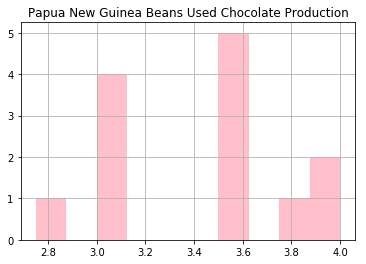

In [57]:
Choc9 = Choc6[Choc6['Bean Origin'] == 'Papua New Guinea']
Choc9 = hist_plot = Choc9['Rating'].hist(color= 'pink')
plt.title('Papua New Guinea Beans Used Chocolate Production')
plt.show()

Conclusion

Upon inspection of the data set and analysis, manufacturers should take into consideration cocoa percentage and bean type ratings for chocolate production. The expert ratings correlated with these variables most reflects productivity and future profits. Since the United States maintains majority of the chocolate production, particular focus should be drawn towards the U.S. Redirecting efforts to boost highest ranking bean type usage in combination with favoral cocoa percent levels would provide the most favorable results.

For future analysis, manufacturers should take into consideration costs, sale rates, consumer ratings. While expert ratings, cocoa percentage, and bean type provide valuable insight for manufacturers, other variables would maximize productivity. Costs and sale rates in correlation to cocoa percentage and bean type ratings would help direct resources to make production more efficient. Furthermore, inclusion of consumer ratings would help target the clientele by uncovering the exact traits that are most appealing to consumers.
